## Veamos un ejemplo bien conocido: el oscilador armónico

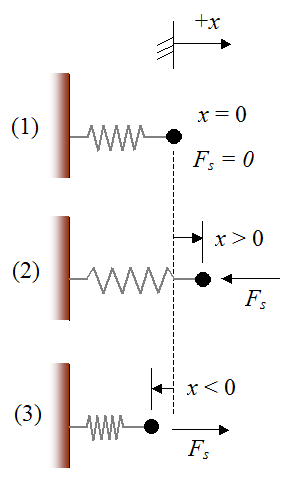

## Segunda ley de Newton

## $\vec{F}_s = m\vec{a}$

## Ley de Hooke (ley del resorte)

## $\vec{F}_s = -kx$


### Reacomodando términos

## $m \dfrac{d^2x}{dt^2} + kx = 0 $





# Así, tenemos:

# $\ddot{x} + \frac{k}{m} x = 0 $

# $\ddot{x} = - \frac{k}{m} x $


## Y podemos cambiar de variable de la siguiente manera:

## $\dot{x} = v$ 

### y así  

## $\ddot{x} = \dot{v}$

### entonces:  

## $\dot{x} = v$ 

## $\dot{v} = - \frac{k}{m} x $

### Sean  $\omega_0^2 \equiv \frac{k}{m}$ $




## Así entonces el sistema dinámico:

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2 x  $

## Lo podemos escribir en forma matricial ($\dot{\vec{x}} = \mathbb{A} \vec{x} $) como:

## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & 0
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$
## Calculamos las ceroclinas del sistema
## $ \dot{x}=0 \iff v=0
$
## $\dot{v}=0 \iff x=0
$
## Por lo tantol sistema tiene un unico punto de equilibrio en (0,0)
## $tr A=0$
## $det A=\omega_0^2$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

# import ipyplot


In [17]:
def Euler2D(f,x0,t0,tf,dt):  ## x0 es un vector de 2D (x0,y0)
    
    T=[]
    X1=[]
    X2=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 2D

    while (t<tf):

        x = x + f(x)*dt  ## x es un vector de 2D
        t = t + dt
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)

    return X1,X2,T

In [18]:
def OsciladorSimple(x):  # x es un vector en 2D  (x,v)
    w0 = 1
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0]

    return y

Text(0, 0.5, '$x_(t)$ y $x_2(t)$')

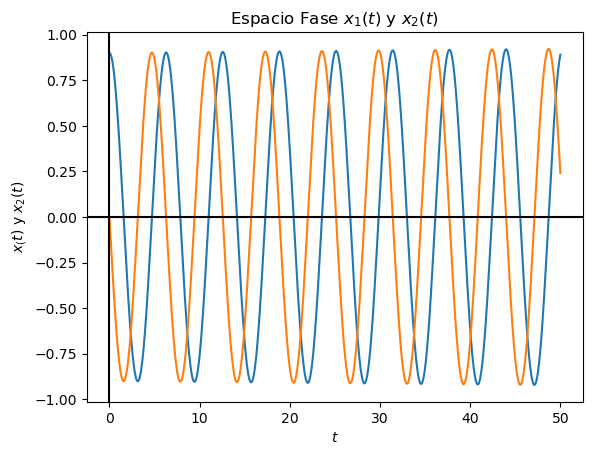

In [20]:
plt.plot(T,X1) 
plt.plot(T,X2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $x_1(t)$ y $x_2(t)$")
plt.xlabel("$t$")
plt.ylabel("$x_(t)$ y $x_2(t)$")

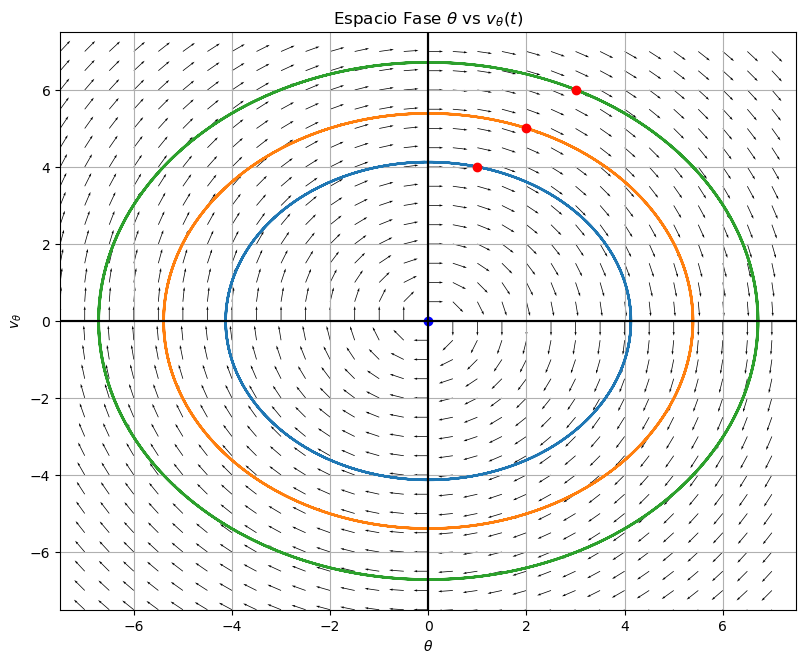

In [54]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


params = np.array([1])  #parametos (w0 = 1)

for i, j in zip([1, 2, 3], [4, 5, 6]): # Integrando y graficando varias solucuiones con condiciones
    x0 = np.array([i,j])

    X,T = EulerND(OsciladorSimple,x0,0,50,0.0001,params)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal
    
    
#### Grafica ######## 

plt.plot(0, 0,'bo')  # punto de equilibrio  (en este caso solo es el origen) 
    
# Titulos de la grafica
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim([-7.5, 7.5])
plt.ylim([-7.5, 7.5])

## Dibujando campo de pendientes

# CampoPend(OsciladorSimple,-7.5,7.5,-7.5,7.5,params,250,0.5)
CampoPendNorm(OsciladorSimple,-7.5,7.5,-7.5,7.5,params,0.5) #version normalizada

## Ejemplo: Oscilador Armónico (amortiguado).

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2  x - \beta v $

## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & - \beta
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}=A \begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$
## $tr A=-\beta$
## $det A=\omega_0^2$ 



In [24]:
def OsciladorAmortiguado(x):  # x es un vector en 2D  (x,v)
    w0 = 1
    beta = .3
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0] - beta*x[1]

    return y

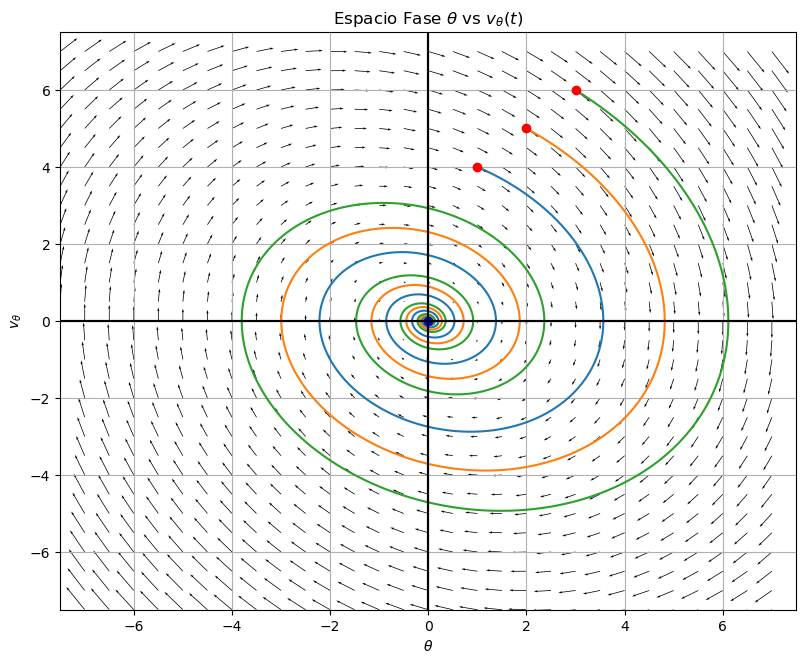

In [53]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(9.5, 7.5))
ax.grid(True)


params = np.array([1,.3])  #parametos (w0 = 1, beta = 0.3)

for i, j in zip([1, 2, 3], [4, 5, 6]): # Integrando y graficando varias solucuiones con condiciones
    x0 = np.array([i,j])

    X,T = EulerND(OsciladorAmortiguado,x0,0,50,0.001,params)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal
    
    
#### Grafica ######## 

plt.plot(0, 0,'bo')  # punto de equilibrio  (en este caso solo es el origen) 
    
# Titulos de la grafica
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim([-7.5, 7.5])
plt.ylim([-7.5, 7.5])

## Dibujando campo de pendientes 

CampoPend(OsciladorAmortiguado,-7.5,7.5,-7.5,7.5,params,300,0.5)
# CampoPendNorm(OsciladorAmortiguado,-7.5,7.5,-7.5,7.5,params,0.5) #version normalizada


In [52]:
def OsciladorSimple(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0]

    return y

def OsciladorAmortiguado(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    beta = params[1]
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0] - beta*x[1]

    return y

Text(0, 0.5, '$x_(t)$ y $x_2(t)$')

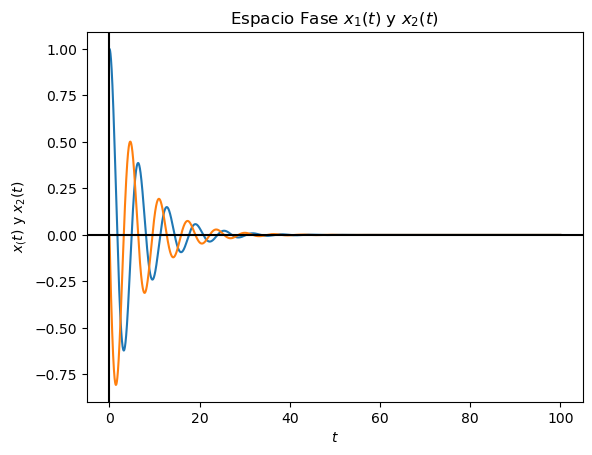

In [26]:
plt.plot(T,X1) 
plt.plot(T,X2)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Espacio Fase $x_1(t)$ y $x_2(t)$")
plt.xlabel("$t$")
plt.ylabel("$x_(t)$ y $x_2(t)$")

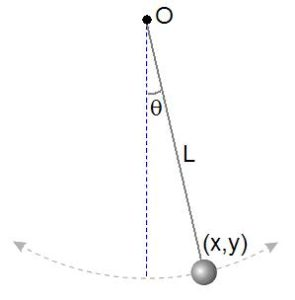

## Ejemplo: Pendulo Simple.
## Por segunda ley de Newton el producto de la masa m por la aceleración tangencial debe ser igual a la componente tangencial de la fuerza 
## $mL\ddot{\theta} = - mg sen(\theta)$
## $\omega_0^2 = \frac{g}{L}$
## $\ddot{\theta} = - \omega_0^2 sen(\theta)$ 

## Nuevamente pasamos la ecuación de segundo grado a un sistema de dos ecuaciones
## $\dot{\theta} = v$ 
## $\dot{v_{\theta}} = - \omega_0^2 sen(\theta)$




In [32]:
def PenduloSimple(x,params):  # x es un vector en 2D  (x,v)
    
    w0 = params[0]
    
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*math.sin(x[0])

    return y

In [33]:
def EulerND(f,x0,t0,tf,dt,params):
        
    T=[]
    X=[]

    for i in range(len(x0)):
        a = []
        X.append(a)
        X[i].append(x0[i])

    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,params)*dt
        t = t + dt
        for i in range(len(x0)):
            X[i].append(x[i])
        T.append(t)

    return X,T

In [36]:
#Campo Vectorial    
def CampoPend(f,xmin,xmax,ymin,ymax,params,escala,paso): 
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            plt.quiver(i, j, y[0], y[1] , width=0.001, scale=escala)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
    
    
############ Version Normalizada, para una mejor visulacizacion (campo de direcciones) #################     

def CampoPendNorm(f,xmin,xmax,ymin,ymax,params,paso):    
    
    for i in np.arange(xmin,xmax, paso):
        for j in np.arange(ymin,ymax, paso):
            v = np.array([i,j])
            y = f(v,params)
            
            N = np.sqrt(y[0]**2+y[1]**2)  #aqui se calcula la norma del vector
            
            if (N != 0): # y se normaliza si el vector es diferente del vector 0
                U, V = float(y[0])/float(N), float(y[1])/float(N)
            else:
                U, V = y[0],y[1]

            plt.quiver(i, j, U, V , width=0.001, scale=50)

    plt.axhline(0, color='black')
    plt.axvline(0, color='black')    
       
        

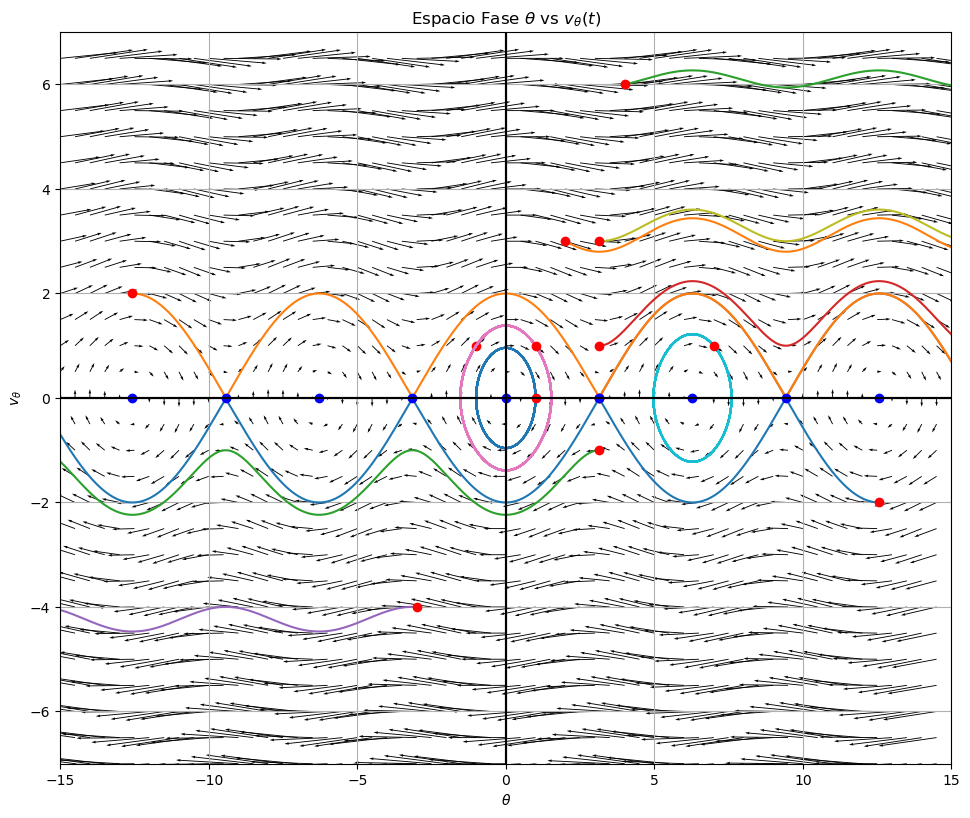

In [48]:
# Condciones para la grafica
fig, ax = plt.subplots(figsize=(11.5, 9.5))
ax.grid(True)

parametros = np.array([1.0])  # parametos (w0 = 1)

# Integrando y graficando varias solucuiones con condiciones
for i, j in [[1,0], [2,3], [4,6], [-1,1], [-3,-4], [3.15,0], [1,1], [np.pi,0], [np.pi, 3], [7,1], [4*np.pi,-2], [-4*np.pi,2], [np.pi,-1],[np.pi,1]]:
    x0 = np.array([i,j])

    X,T = EulerND(PenduloSimple,x0,0,50,0.0001,parametros)

    plt.plot(X[0],X[1])
    plt.plot(x0[0],x0[1],'ro')  #Condicion inicilal    

    
#### Grafica ######## 

for n in range(-5,5,1):  # graficando puntos de equilibrio  (en este caso (0,n*pi) )
    plt.plot(n*np.pi,0, 'bo') 
    
# Titulos de la grafica
plt.title("Espacio Fase $\\theta$ vs $v_{\\theta}(t)$")
plt.xlabel("$\\theta$")
plt.ylabel("$v_{\\theta}$")

# Ejes y limites de la grafica
plt.axhline(0, color='black')
plt.axvline(0, color='black') 
plt.xlim([-15, 15])
plt.ylim([-7, 7])

## Dibujando campo de pendientes 

CampoPend(PenduloSimple,-15, 15,-7,7,parametros,100,0.5)
# CampoPendNorm(PenduloSimple,-15, 15,-7,7,parametros,0.5) #version normalizada    
 

